# Bike Sharing Assignment

Problem Statement:
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

In an attempt to have a mindful business plan, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. 

Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes. <br>
How well those variables describe the bike demands

## Step 1: Reading and Understanding the Data
Let us first import NumPy and Pandas and read the daily bike demands

In [2]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd

In [4]:
bike_demand = pd.read_csv("day.csv")
bike_demand.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Inspect the various aspects of the data

In [5]:
bike_demand.shape

(730, 16)

In [6]:
bike_demand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


Above tells us that there are no NULL in the dataset. Hence, no null treatement is required.

#### Numerical Variables
temp, atemp, hum, windspeed, casual, registered, cnt


#### Categorical Variables
season, yr, mnth, holiday, weekday, workingday, weathersit


In [7]:
bike_demand.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Step 2: Visualising the Data

We'll visualise our data using matplotlib and seaborn. It will help us in understanding the data.

We will look for any obvious multicollinearity going on. We will also identify if some predictors directly have a strong association with the outcome variable.


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

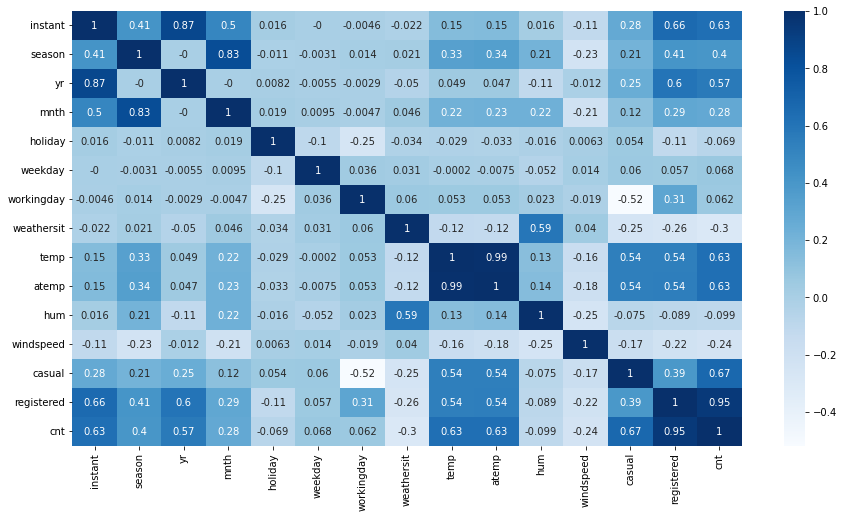

In [9]:
corr_matrix = bike_demand.corr()
corr_matrix = corr_matrix.round(4)
plt.figure(figsize = (15,8))
sns.heatmap(corr_matrix, cmap = "Blues", annot = True)

From above correlation diagram, it seems the p-value of 'temp' and 'atemp' is almost same and which makes sense as they are related indicating the acutal and feels-like temperature of the day. So we will drop temp feature and use atemp.

Also, it demand (i.e. cnt) seems to have highest correlation with temperature of the day. Some positive correlation with season and month. Mildly negative correlation with winfspeed.

Data Leak - Though demand seems to have high correlation with registered feature but this value will not be availabe at the time of making prediction. So this feature, along with casual feature will also be dropped.

#### Visualising Numeric Variables.

Let's make a pairplot of all the numeric variables

In [10]:
# Making list of important numerical variables otherwise plot with be drawn for all the variables having numerical values but are categorical.

num_var_list = ['atemp', 'hum', 'windspeed', 'cnt']

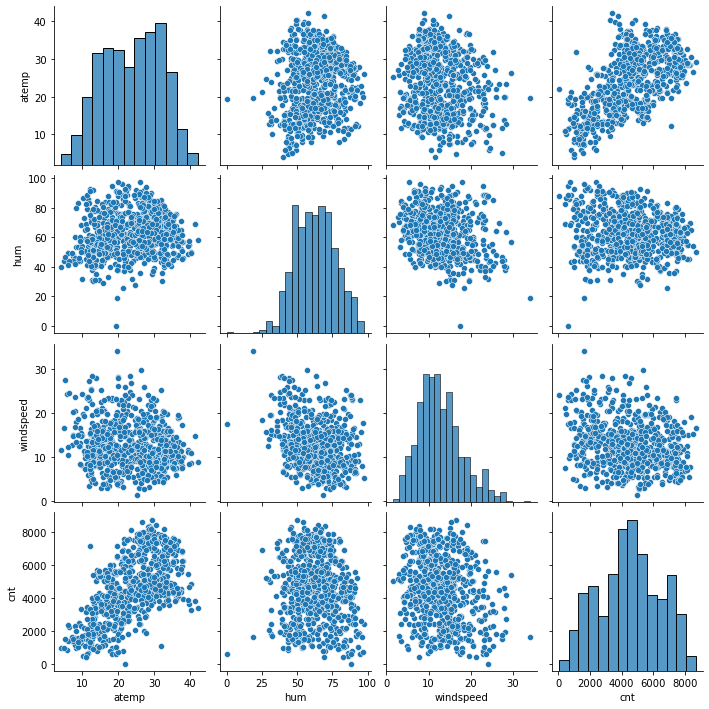

In [11]:
sns.pairplot(bike_demand[num_var_list])
plt.show()

Observation: cnt has a linear relationship with atemp. No clear visible pattern in other plots.

#### Visualize the categorical variables
We will draw box plots.

<AxesSubplot:xlabel='season', ylabel='cnt'>

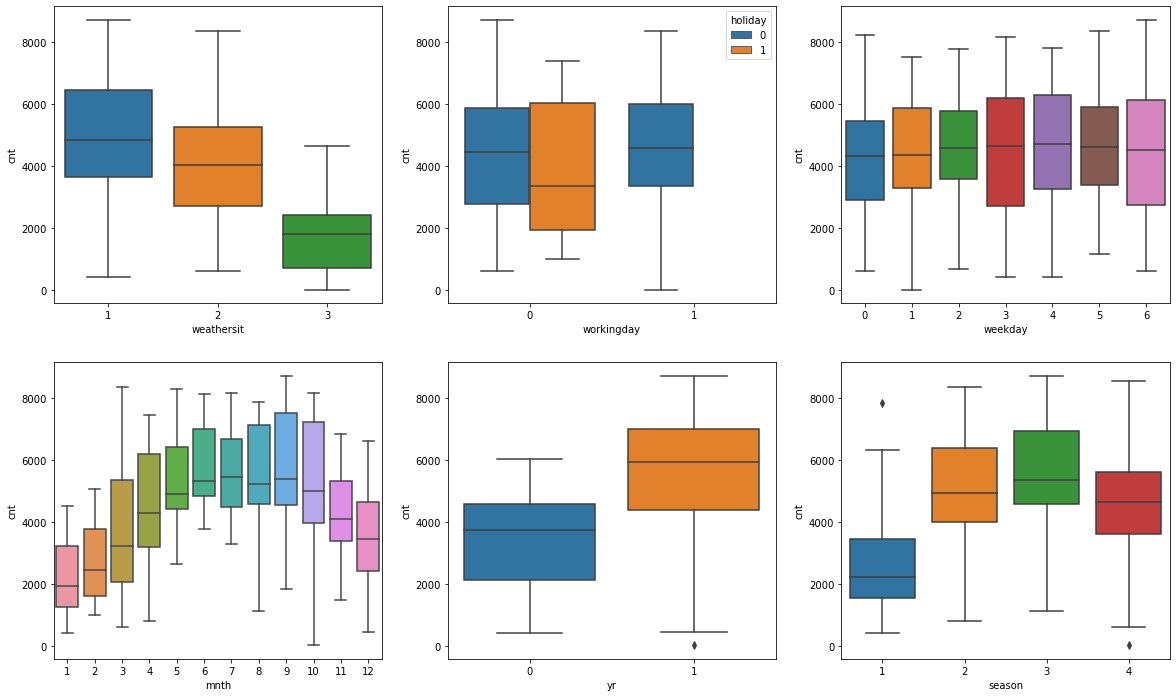

In [12]:
plt.figure(figsize = (20,12))
plt.subplot(2,3,1)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_demand)
plt.subplot(2,3,2)
sns.boxplot(x = 'workingday', y = 'cnt', hue = 'holiday', data = bike_demand)
plt.subplot(2,3,3)
sns.boxplot(x = 'weekday' , y = 'cnt', data = bike_demand)
plt.subplot(2,3,4)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_demand)
plt.subplot(2,3,5)
sns.boxplot(x = 'yr', y ='cnt', data = bike_demand)
plt.subplot(2,3,6)
sns.boxplot(x = 'season', y = 'cnt', data = bike_demand)


#### Observations:

weathersit: For days when weather = 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog; there were no bike rentals.
            Clear weather has highest count for bike rentals. So places were weather stays mostly clear, will be good to target.
            
workingday: 25th qualtile for working days is higher than the 25th quantile of non-working days. And for holidays, bike demand               is even lower.

weekday: There is no particular pattern to observe here.

mnth: Bikes are in high demand from May to October.

season: summer and fall season's have higher usage than other seasons.

## Step 3: Data Preparation

In [13]:
# drop vroables that are not required.

bike_demand.drop(['instant', 'dteday', 'temp', 'casual', 'registered'], axis = 1, inplace = True)

bike_demand.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,11.46350,43.6957,12.522300,1600


### Dummy Variables

The variable 'weathersit' has three levels as per our plot above. <br>
The variable 'weekday' has seven levels as per our plot above. <br>
The variable 'mnth' has twelve levels as per our plot above. <br>
The variable 'season' has four levels as per our plot above. <br>


While performing the analysis, we will drop the first column to avoid having multi-collinearity problem. First column can be easily reproduced with the help of two other retained levels.

In [17]:
weathersit = pd.DataFrame()
weathersit[['mist', 'light_rain']] = pd.get_dummies(bike_demand['weathersit'], drop_first = True)

In [18]:
weathersit.head()

,mist,light_rain
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [19]:
weathersit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   mist        730 non-null    uint8
 1   light_rain  730 non-null    uint8
dtypes: uint8(2)
memory usage: 1.6 KB


In [22]:
weekday = pd.DataFrame()
weekday[['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday']] = pd.get_dummies(bike_demand['weekday'], drop_first = True)
weekday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   monday     730 non-null    uint8
 1   tuesday    730 non-null    uint8
 2   wednesday  730 non-null    uint8
 3   thursday   730 non-null    uint8
 4   friday     730 non-null    uint8
 5   saturday   730 non-null    uint8
dtypes: uint8(6)
memory usage: 4.4 KB


In [23]:
mnth = pd.DataFrame()
mnth[['feb','mar','apr','may','june','july','aug','sep','oct','nov','dec']] = pd.get_dummies(bike_demand['mnth'], drop_first = True)
mnth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   feb     730 non-null    uint8
 1   mar     730 non-null    uint8
 2   apr     730 non-null    uint8
 3   may     730 non-null    uint8
 4   june    730 non-null    uint8
 5   july    730 non-null    uint8
 6   aug     730 non-null    uint8
 7   sep     730 non-null    uint8
 8   oct     730 non-null    uint8
 9   nov     730 non-null    uint8
 10  dec     730 non-null    uint8
dtypes: uint8(11)
memory usage: 8.0 KB


In [24]:
mnth.head()

,feb,mar,apr,may,june,july,aug,sep,oct,nov,dec
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0


In [25]:
season = pd.DataFrame()
season[['summer','fall','winter']] = pd.get_dummies(bike_demand['season'], drop_first = True)
season.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   summer  730 non-null    uint8
 1   fall    730 non-null    uint8
 2   winter  730 non-null    uint8
dtypes: uint8(3)
memory usage: 2.3 KB


In [26]:
season.head()

,summer,fall,winter
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [27]:
# Add the results to the original bike_demand dataframe
bike_demand = pd.concat([bike_demand, weathersit, weekday, mnth, season], axis = 1)
bike_demand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   atemp       730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
 11  mist        730 non-null    uint8  
 12  light_rain  730 non-null    uint8  
 13  monday      730 non-null    uint8  
 14  tuesday     730 non-null    uint8  
 15  wednesday   730 non-null    uint8  
 16  thursday    730 non-null    uint8  
 17  friday      730 non-null    uint8  
 18  saturday    730 non-null    uint8  
 19  feb         730 non-null    u

In [28]:
# Drop the features for whom dummy variables got created

bike_demand.drop(['weathersit', 'weekday', 'mnth', 'season'], axis = 1, inplace = True)
bike_demand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   atemp       730 non-null    float64
 4   hum         730 non-null    float64
 5   windspeed   730 non-null    float64
 6   cnt         730 non-null    int64  
 7   mist        730 non-null    uint8  
 8   light_rain  730 non-null    uint8  
 9   monday      730 non-null    uint8  
 10  tuesday     730 non-null    uint8  
 11  wednesday   730 non-null    uint8  
 12  thursday    730 non-null    uint8  
 13  friday      730 non-null    uint8  
 14  saturday    730 non-null    uint8  
 15  feb         730 non-null    uint8  
 16  mar         730 non-null    uint8  
 17  apr         730 non-null    uint8  
 18  may         730 non-null    uint8  
 19  june        730 non-null    u

# Step 4: Splitting the Data into Training and Testing Sets

In [29]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(bike_demand, train_size = 0.8, test_size = 0.2, random_state = 100)

### Rescaling the features
We will be using Min-Max scaling

In [30]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [31]:
# Apply scaler to all the variables except the ones that have Yes/No (0/1) and 'dummy' variable

num_vars_scale = ['atemp', 'hum','windspeed']

df_train[num_vars_scale] = scaler.fit_transform(df_train[num_vars_scale])

df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,mist,light_rain,monday,...,june,july,aug,sep,oct,nov,dec,summer,fall,winter
367,1,0,1,0.061963,0.454701,0.695175,2236,0,0,0,...,0,0,0,0,0,0,0,0,0,0
648,1,0,1,0.462175,0.477458,0.299450,7570,0,0,0,...,0,0,0,0,1,0,0,0,0,1
44,0,0,1,0.419099,0.387290,0.807474,1913,0,0,1,...,0,0,0,0,0,0,0,0,0,0
705,1,0,1,0.318824,0.787463,0.189819,5008,1,0,0,...,0,0,0,0,0,0,1,0,0,1
379,1,0,0,0.108365,0.431945,0.449210,2311,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
df_train.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,mist,light_rain,monday,...,june,july,aug,sep,oct,nov,dec,summer,fall,winter
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,...,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,0.513699,0.027397,0.667808,0.513175,0.649499,0.319463,4505.267123,0.342466,0.027397,0.148973,...,0.077055,0.075342,0.090753,0.080479,0.092466,0.080479,0.087329,0.246575,0.251712,0.250000
std,0.500241,0.163378,0.471403,0.211663,0.144219,0.168114,1958.617712,0.474941,0.163378,0.356367,...,0.266907,0.264169,0.287504,0.272267,0.289931,0.272267,0.282558,0.431387,0.434369,0.433384
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.331819,0.535852,0.199177,3070.250000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.530558,0.653714,0.294764,4566.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.690521,0.752361,0.410413,6035.750000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.250000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8714.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


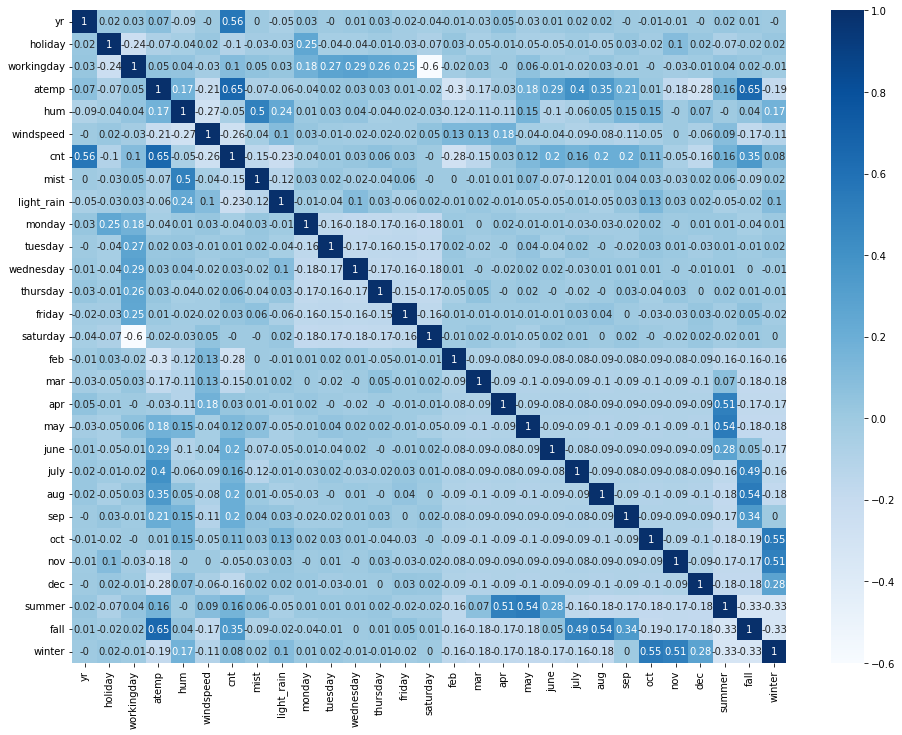

In [33]:
# Let us check the correlation co-efficients to check which features are highly correlated.

df_train_corr = df_train.corr()
df_train_corr = df_train_corr.round(2)
plt.figure(figsize = (16,12))
sns.heatmap(df_train_corr, annot = True, cmap = 'Blues')
plt.show()

#### Observations:

There is a strong positive correltion between cnt and atemp.
There seem to be a positive correlation between summar and apr/may/june, between fall and july/aug/sep & winter and Oct/nov/dec.

### Dividing into X and Y sets for the model building

In [34]:
y_train = df_train.pop('cnt')
X_train = df_train


# Step 5: Building a linear model

In [35]:
import statsmodels.api as sm

# add a constant so model does not fit a line passsing through the origin. 
# Also, we will first train model only using the atemp feature.

X_train_sm = sm.add_constant(X_train[['atemp']])
X_train_sm.head()

,const,atemp
367,1.0,0.061963
648,1.0,0.462175
44,1.0,0.419099
705,1.0,0.318824
379,1.0,0.108365


In [36]:
# create a first fitted model
lr = sm.OLS(y_train, X_train_sm).fit()

In [37]:
# Check the parameters

lr.params

const    1408.719744
atemp    6034.094848
dtype: float64

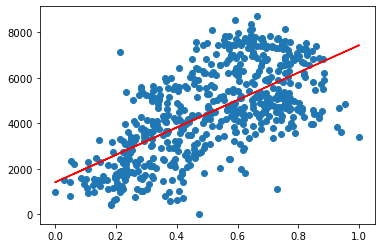

In [38]:
# Visualize the fitted line

plt.scatter(X_train_sm.iloc[:,1], y_train)
plt.plot(X_train_sm.iloc[:,1], 1408.7197 + 6034.0948 * X_train_sm.iloc[:,1], 'r')
plt.show()

Observation: Line is fitting very well.

In [39]:
# Print a summary of linear regression model obtained

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.425
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     430.6
Date:                Wed, 15 Jun 2022   Prob (F-statistic):           5.23e-72
Time:                        02:56:18   Log-Likelihood:                -5093.2
No. Observations:                 584   AIC:                         1.019e+04
Df Residuals:                     582   BIC:                         1.020e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1408.7197    161.406      8.728      0.0

Observation:
#P-value of const and atemp is telling us that both of these variables are significant. <br>
#R-Squared is telling us, only 42% of the variance in bike demand ('cnt') is explained by atemp.<br>
#Prob(F-stat) is low, that means fit is not by chance. <br>

## RFE
We will employ RFE technique to understand the most important independent variables.

In [40]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [41]:
#RFE for 10 variables

lm_rfe = LinearRegression()
lm_rfe.fit(X_train,y_train)

rfe = RFE(lm_rfe, 10)
rfe = rfe.fit(X_train, y_train)

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 5),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('mist', False, 3),
 ('light_rain', True, 1),
 ('monday', False, 13),
 ('tuesday', False, 14),
 ('wednesday', False, 18),
 ('thursday', False, 19),
 ('friday', False, 15),
 ('saturday', False, 4),
 ('feb', False, 12),
 ('mar', False, 9),
 ('apr', False, 10),
 ('may', False, 8),
 ('june', False, 7),
 ('july', False, 11),
 ('aug', False, 6),
 ('sep', True, 1),
 ('oct', False, 2),
 ('nov', False, 16),
 ('dec', False, 17),
 ('summer', True, 1),
 ('fall', True, 1),
 ('winter', True, 1)]

Observations: holiday is selected - from plot observation was demand is less on holidays.
weathersit variables - atemp, hum, windspeed, light_rain are selected. mist is not selected, may be due to constraint of 10 variables.<br>

season variables - summer, fall, winter are selected.<br>

mnth variables - jan, feb, mar...dec - are not selected except sep. From correlation matrix and this knowledge, I infer that it might be good to check the multicollinearity between mnth and season variable.


# Building model using statsmodel and eliminate insignificant variable using VIF

In [42]:
# Feature list to be used for building model

col = ['yr','holiday', 'atemp', 'hum', 'windspeed', 'light_rain', 'feb', 'mar', 'apr', 'may', 'june', 'july', 'aug', 'sep', 'oct','nov', 'dec', 'summer', 'fall', 'winter']

In [43]:
X_train_vif_1 = X_train[col]

X_train_vif_1 = sm.add_constant(X_train_vif_1)

lm_1 = sm.OLS(y_train,X_train_vif_1).fit() # Running the linear model

print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     147.0
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          2.42e-208
Time:                        02:56:28   Log-Likelihood:                -4721.1
No. Observations:                 584   AIC:                             9484.
Df Residuals:                     563   BIC:                             9576.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2291.4185    231.554      9.896      0.0

#### Observation:
Above summary's interpretation matched with what was suggested by RFE method. All the mnth dummy variables have high p-value except 'sep'.

Hence, Removing these features and again display the summary.

In [44]:
# Build the model again by removing the mnth dummy variables except sep.

col_2 = ['yr','holiday', 'atemp', 'hum', 'windspeed', 'light_rain', 'sep', 'summer', 'fall', 'winter']

In [45]:
X_train_vif_2 = X_train[col_2]

X_train_vif_2 = sm.add_constant(X_train_vif_2)

lm_2 = sm.OLS(y_train, X_train_vif_2).fit() 

print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     280.3
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          3.02e-213
Time:                        02:56:35   Log-Likelihood:                -4737.0
No. Observations:                 584   AIC:                             9496.
Df Residuals:                     573   BIC:                             9544.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2274.8395    217.651     10.452      0.0

#### Observation:
All features have approximate zero p-value now. <br>
F-stat has gone up significantly with minor change in R-squared and Adj R-squared. <br>
This model (lm_2) is significantly better than first model (lr) that we built.

# VIF Calculation

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['feature'] = X_train_vif_2.columns
vif['vif'] = [variance_inflation_factor(X_train_vif_2.values, i) for i in range(X_train_vif_2.shape[1])]
vif['vif'] = round(vif['vif'], 2)
vif = vif.sort_values(by = 'vif', ascending = False)
vif

,feature,vif
0,const,41.76
9,fall,4.51
3,atemp,3.12
8,summer,2.55
10,winter,1.91
4,hum,1.26
5,windspeed,1.17
7,sep,1.17
6,light_rain,1.11
1,yr,1.02


#### Observation:
Generally, VIF lower than 5 is acceptable. 'const' has very high value of VIF. So we will remove the 'const' and then see if VIF changes for other features.

In [47]:
X_train_vif_2.drop(['const'], axis = 1, inplace = True)

In [48]:
vif = pd.DataFrame()
vif['feature']= X_train_vif_2.columns
vif['vif']=[variance_inflation_factor(X_train_vif_2.values, i) for i in range(X_train_vif_2.shape[1])]
vif['vif']=round(vif['vif'], 2)
vif = vif.sort_values(by = 'vif', ascending = False)

In [49]:
vif

,feature,vif
2,atemp,19.87
3,hum,10.73
8,fall,6.00
4,windspeed,3.60
7,summer,3.37
9,winter,2.54
0,yr,2.02
6,sep,1.27
5,light_rain,1.09
1,holiday,1.04


#### Observation:
atemp feature has very strong linear relationship that alone explains 40% of the bike demand. So removing that will not be a great idea. I will remove hum feature.

In [50]:
col_3 = ['yr','holiday', 'atemp','fall' ,'windspeed', 'light_rain', 'summer', 'winter', 'sep']
X_train_vif_3 = X_train[col_3]

vif = pd.DataFrame()
vif['feature']= X_train_vif_3.columns
vif['vif']=[variance_inflation_factor(X_train_vif_3.values, i) for i in range(X_train_vif_3.shape[1])]
vif['vif']=round(vif['vif'], 2)
vif = vif.sort_values(by = 'vif', ascending = False)
vif

,feature,vif
2,atemp,12.96
3,fall,5.71
6,summer,3.35
4,windspeed,3.08
7,winter,2.47
0,yr,2.01
8,sep,1.25
5,light_rain,1.06
1,holiday,1.04


#### Observation:

VIF still is high, so removing the 'fall' feature next. Also, removing 'sep' feature as well because categorical plot does not show any particular significance as compared to other months like june, july etc.

In [51]:
col_4 = ['yr','holiday', 'atemp','windspeed', 'light_rain', 'summer', 'winter']
X_train_vif_4 = X_train[col_4]

vif = pd.DataFrame()
vif['feature']= X_train_vif_4.columns
vif['vif']=[variance_inflation_factor(X_train_vif_4.values, i) for i in range(X_train_vif_4.shape[1])]
vif['vif']=round(vif['vif'], 2)
vif = vif.sort_values(by = 'vif', ascending = False)
vif

,feature,vif
2,atemp,3.31
3,windspeed,2.91
0,yr,1.99
5,summer,1.52
6,winter,1.36
4,light_rain,1.05
1,holiday,1.03


#### Observation:
Now all the features have VIF less than 5. This is our final list of features to train the model.

# Train the final model

In [52]:
X_train_vif_4 = X_train[col_4]

X_train_vif_4 = sm.add_constant(X_train_vif_4)

lm_4 = sm.OLS(y_train, X_train_vif_4).fit() 

print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     312.5
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          1.75e-191
Time:                        02:57:00   Log-Likelihood:                -4797.0
No. Observations:                 584   AIC:                             9610.
Df Residuals:                     576   BIC:                             9645.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        626.3026    148.445      4.219      0.0

#### Observations:
F-stat is 312 which is highest among all the models trained so far. <br>
p-value of all features is approximate zero.
VIF of all the features is less than 5.
Adjusted R-squared is 78.9% which means model explains the approximate 79% variation in the bike demand. Anything above 75% is a good model.

# Residual Analysis of the train data
Validate if error terms are normally distributed. Plotting the histogram of the error terms:

In [53]:
y_train_cnt = lm_4.predict(X_train_vif_4)

In [54]:
# Import the required libraries for plots.

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

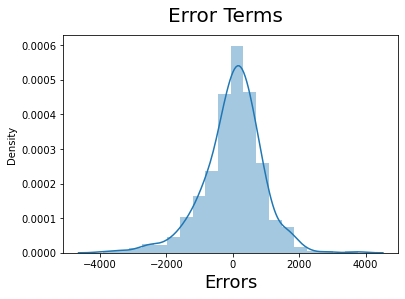

In [55]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)       # Plot heading 
plt.xlabel('Errors', fontsize = 18)              # X-label

#### Observations:
Error terms are nominally distributed. Hence, assumption of linear regression is true.

# Making the Predictions

In [57]:
# Applying scaling on the test set

df_test[num_vars_scale] = scaler.transform(df_test[num_vars_scale])

y_test = df_test.pop('cnt')
X_test = df_test

In [58]:
# use our model to make predictions

X_test_new = X_test[col_4]
X_test_new = sm.add_constant(X_test_new)

# Making prediction

y_pred = lm_4.predict(X_test_new)


# Model Evaluation

Text(0, 0.5, 'y_pred')

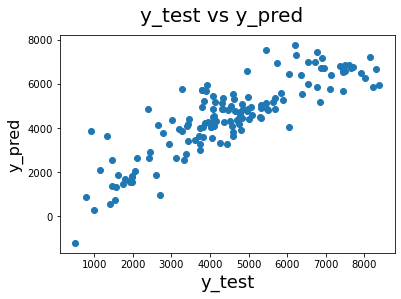

In [59]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

### Calculate the Adjusted R2

In [60]:
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_pred)
r_squared

0.72373161509396

In [64]:
no_of_var = df_test.shape[1]
no_of_rcd = df_test.shape[0]

adj_R2 = 1 - ((1-r_squared)*(no_of_rcd-1))/(no_of_rcd-no_of_var-1)
adj_R2

0.6576161041762753

#### Observation - R-squared and Adjusted R-squared values:

R2 value on the test data comes out to be 0.723. <br>
R2 value of the model on the training data is 0.792. 

Adjusted R2 value on the test data comes out to be 0.657. <br>
Adjusted R2 value of the model on the training data is 0.789.

This model is doing pretty good but its not the perfect model. Some of the ideas are:<br>
-May be trying different percentages of training and test data might close the gap between Adjusted R2 values.<br>
-Train the model iteratively by selecting different sets of data for training and testing.

# Final Model is-

cnt = 626.3026 + 1999.4631 * yr -783.3733 * holiday + 5602.8603 * atemp - 1101.0737 * windspeed - 2147.8988 * light_rain + 567.5711 * summer + 1074.8253 * winter

Bike sharing company wanted to understand the factors affecting the demand for these shared bikes in the American market. 

#### Variables that are significant in predicting the demand for shared bikes are:
'yr','holiday', 'atemp','windspeed', 'light_rain', 'summer', 'winter'

#### Conclusion from the attributes:
Temperature of the day affects the demand of the bikes significantly. <br>
Season -  In summer and fall season, demand seems to be better than other seasons. <br>
Yr - Fact that demand is higher in 2019 than 2018 shows that demand is growing year on year.<br>
Mnth - May to October months have higher demand than other months in year. <br>
Holiday - Demand is lower on holidays than other non-working days.<br>
Weekday - There is no remarkable variation in demand over the weekdays.<br>
Workingday - Working days have higher demand for bikes than the non-working days.<br>
Weathersit - Clear and partly cloudy days have better demand for bikes than the days when light or heavy rain occurs.<br>


#### How well these variables describe the bike demands:
Co-efficients in above equation for a variable, other variables remaining constant, describe the extent to which that independent variable impacts the demand of bikes.
